# Stroke Prediction

## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data Visualization

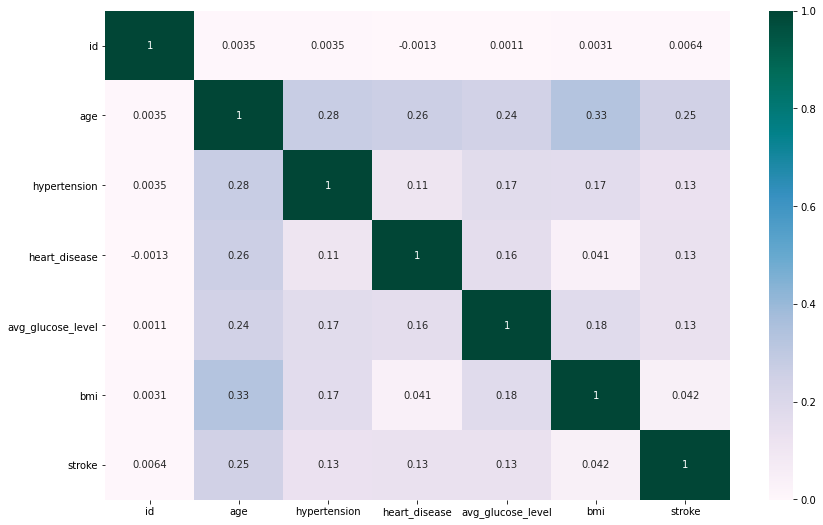

In [5]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='PuBuGn')
plt.show()

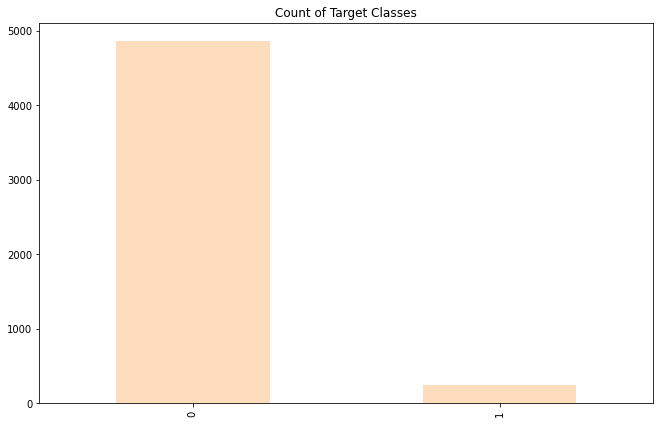

In [6]:
df['stroke'].value_counts().plot(
    kind='bar',
    figsize=(11, 7),
    title='Count of Target Classes',
    color='#feddbe'
)
plt.show()

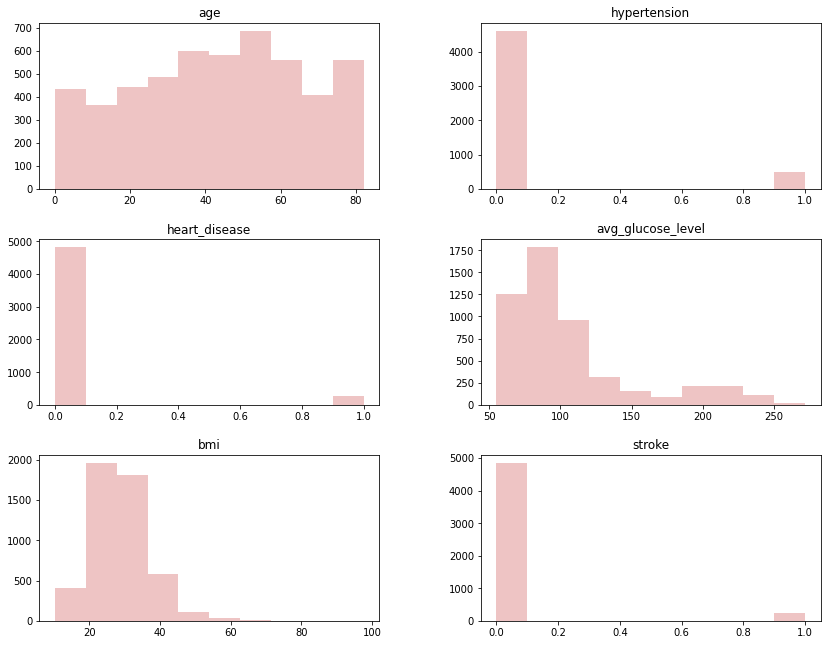

In [7]:
df.drop(columns=['id']).hist(grid= False, figsize=(14, 11), color='#eec4c4')
plt.show()

## Data Preprocessing

### Fill Missing Data in Column bmi with mean bmi

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Split into Features and Target Variable

In [10]:
X = df.iloc[:, 1:-1].values
X

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794666,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [11]:
y = df.iloc[:, -1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Encode Categorical Data

### Encode Column smoking_status and work_type with OneHotEncoder

In [12]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('endcoder', OneHotEncoder(), [5, 9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 'Urban', 228.69, 36.6],
       [0.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.893236911794666],
       [0.0, 0.0, 1.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [0.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 0.0, 1.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

In [15]:
df_vis = pd.DataFrame(X)
df_vis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Male,67.0,0,1,Yes,Urban,228.69,36.6
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Female,61.0,0,0,Yes,Rural,202.21,28.893237
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Male,80.0,0,1,Yes,Rural,105.92,32.5
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,49.0,0,0,Yes,Urban,171.23,34.4
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Female,79.0,1,0,Yes,Rural,174.12,24.0


### Encode Column gender, ever_married, and Residence_type with LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 9] = le.fit_transform(X[:, 9])
le = LabelEncoder()
X[:, 13] = le.fit_transform(X[:, 13])
le = LabelEncoder()
X[:, 14] = le.fit_transform(X[:, 14])

In [17]:
df_vis = pd.DataFrame(X)
df_vis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,67.0,0,1,1,1,228.69,36.6
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,61.0,0,0,1,0,202.21,28.893237
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,80.0,0,1,1,0,105.92,32.5
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,49.0,0,0,1,1,171.23,34.4
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,79.0,1,0,1,0,174.12,24.0


## Split into Training Set and Test Set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

columns to scale: age, avg_glucose_level, bmi

In [19]:
columns_to_scale = [10, 15, 16]

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, columns_to_scale] = sc.fit_transform(X_train[:, columns_to_scale])
X_test[:, columns_to_scale] = sc.transform(X_test[:, columns_to_scale])

In [21]:
df_vis = pd.DataFrame(X_train)
df_vis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.328243,0,0,1,0,-0.860231,0.995134
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.416494,0,0,1,0,-0.501703,2.50152
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.730767,0,0,1,0,-0.907255,0.241941
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.392648,0,0,1,0,-0.606126,0.050451
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.436774,0,0,1,1,-1.050975,-0.42189


## Oversampling Target Classes with SMOTE

In [25]:
(unique, counts) = np.unique(y_train, return_counts=True)
print(np.array((unique, counts)).T)

[[   0 3893]
 [   1  195]]


In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [27]:
(unique, counts) = np.unique(y_train_res, return_counts=True)
print(np.array((unique, counts)).T)

[[   0 3893]
 [   1 3893]]


## Training Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=0)

## Evaluate Model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f'accuracy score: {"{:.2f}".format(accuracy_score(y_test, y_pred)*100)} %')

[[937  31]
 [ 50   4]]
accuracy score: 92.07 %


### Evaluate with k-Fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train_res, y=y_train_res, cv=10)
print(f'10-fold cross validation mean accuracy: {"{:.2f}".format(accuracies.mean()*100)} %')
print(f'standard deviation: {"{:.2f}".format(accuracies.std()*100)} %')

10-fold cross validation mean accuracy: 96.98 %
standard deviation: 2.62 %


### Evaluate with Cumulative Accuracy Profile (CAP)

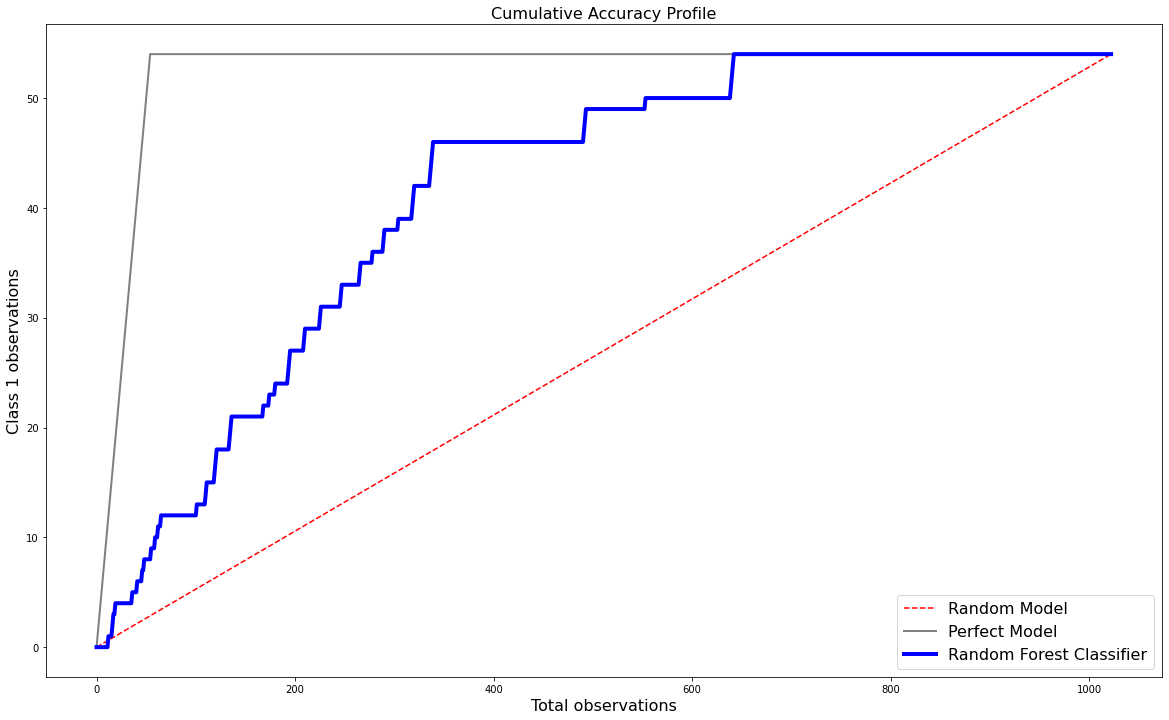

In [31]:
total = len(y_test)
class_1_count = np.sum(y_test==1)
class_0_count = np.sum(y_test==0)
plt.figure(figsize = (20, 12))

# Random Model
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

# Perfect Model
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

# Trained Model
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)
plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Random Forest Classifier', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()

### Analysis using Plot

Percentage: 90.74%


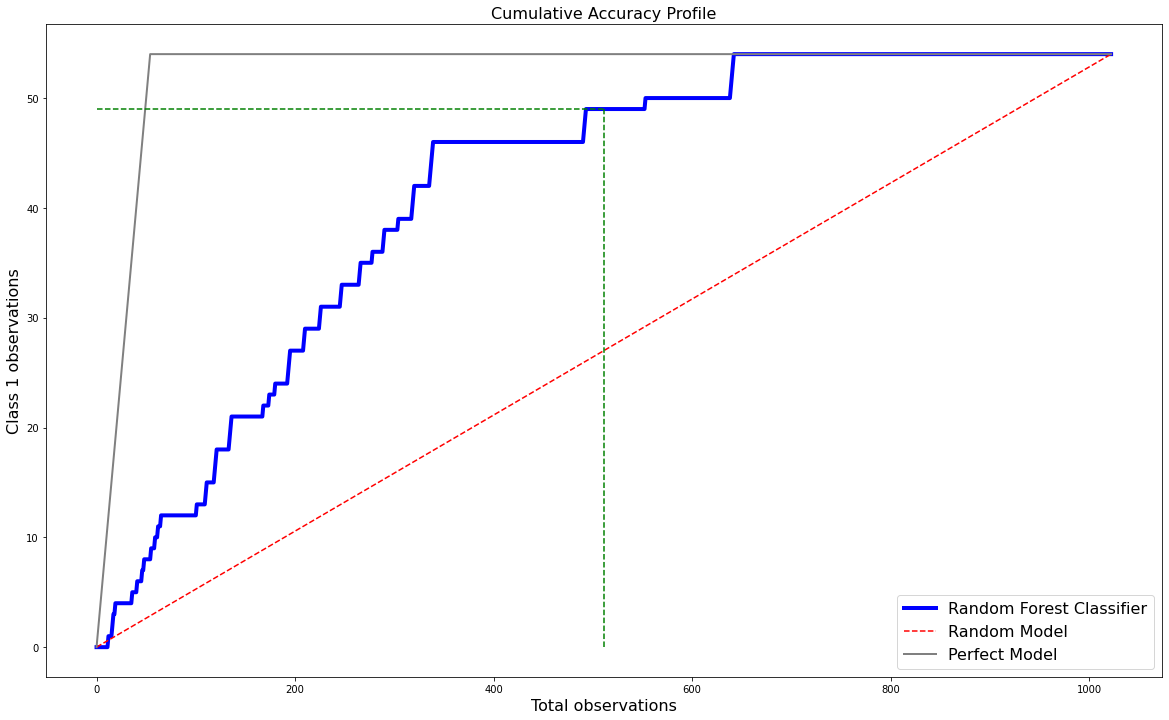

In [32]:
plt.figure(figsize = (20, 12))
plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Random Forest Classifier', 
         linewidth = 4)
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth=2, 
         label = 'Perfect Model')

# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)

plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
print("Percentage: {0:.2f}%".format(class_1_observed))

## Hyperparameter Tuning

In [33]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [34]:
n_estimators = np.arange(10, 160, 10)
random_state = np.arange(0, 21)

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'n_estimators': n_estimators,
        'criterion': ['entropy', 'gini'],
        'random_state': random_state,
    }
]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'best 10-fold cross validation mean accuracy: {"{:.2f}".format(best_accuracy*100)} %')
print(f'best parameters: {best_parameters}')

best 10-fold cross validation mean accuracy: 97.15 %
best parameters: {'criterion': 'entropy', 'n_estimators': 140, 'random_state': 5}


In [36]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
278,1.566643,0.021448,0.030297,0.007549,entropy,140,5,"{'criterion': 'entropy', 'n_estimators': 140, ...",0.898588,0.985879,...,0.979461,0.978177,0.980745,0.970437,0.975578,0.970437,0.987147,0.971490,0.025034,1
119,0.668953,0.012875,0.012502,0.006251,entropy,60,14,"{'criterion': 'entropy', 'n_estimators': 60, '...",0.894737,0.985879,...,0.982028,0.982028,0.982028,0.971722,0.974293,0.975578,0.980720,0.971361,0.025909,2
131,0.786100,0.016619,0.013551,0.004556,entropy,70,5,"{'criterion': 'entropy', 'n_estimators': 70, '...",0.889602,0.984596,...,0.979461,0.982028,0.982028,0.970437,0.978149,0.971722,0.987147,0.971105,0.027675,3
236,1.326493,0.015049,0.028127,0.006250,entropy,120,5,"{'criterion': 'entropy', 'n_estimators': 120, ...",0.901155,0.984596,...,0.982028,0.979461,0.978177,0.969152,0.975578,0.970437,0.987147,0.971104,0.023968,4
299,1.671360,0.017399,0.030800,0.001250,entropy,150,5,"{'criterion': 'entropy', 'n_estimators': 150, ...",0.898588,0.984596,...,0.979461,0.978177,0.980745,0.970437,0.974293,0.970437,0.987147,0.971104,0.024859,4


In [37]:
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f'accuracy score: {"{:.2f}".format(accuracy_score(y_test, y_pred)*100)} %')

[[941  27]
 [ 49   5]]
accuracy score: 92.56 %
